# Libraries and Data Load

## Load Libraries

In [1]:
######################################################Initial Packages########################################################
#Basic Operating System Stuff
import os
import gc #garbage collector
import random #random seed generator
import pandas_profiling # requires import and prior install 

#Timer
from timeit import default_timer as timer #import a timer

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
from pandas_profiling import ProfileReport
import math #math functions
import numpy as np    #numerical package
from patsy import dmatrix, demo_data, ContrastMatrix, Poly

#Scikit learn
from math import sqrt
import sklearn as sk  #scikit learn
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample #sampling
from sklearn.model_selection import train_test_split as tts, KFold #train test split
from sklearn.decomposition import PCA #principal components
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique
from sklearn.metrics import classification_report as CR,confusion_matrix, roc_curve, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay, average_precision_score #for 2-class model
from sklearn.preprocessing import MinMaxScaler as Scaler, PolynomialFeatures as poly # used for variable scaling data
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier as RFC, ExtraTreesClassifier as ETC, GradientBoostingClassifier as GBC,AdaBoostClassifier as ABC  # Random Forest package
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.naive_bayes import BernoulliNB as bnb, GaussianNB, MultinomialNB as mnb
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import GridSearchCV


from scipy import misc, stats as st #Lots of stuff here
import itertools

import statsmodels.api as sm
import pyreadstat

#Graphing
import seaborn as sns
#import pydot  #For model plotting
import graphviz #python-graphviz package
from IPython.display import SVG #Same here
import matplotlib.pyplot as plt #plotting
import matplotlib #image save
from matplotlib.pyplot import imshow #Show images
from PIL import Image #Another image utility
import cv2 #more image utilities

%matplotlib inline

os.chdir('c:/users/lfult/documents/bankruptcy study')
##############################################################################################################################

## Load Data

In [2]:
##############################################################################################################################
train=pd.read_csv('originaltrain.csv')
test=pd.read_csv('originaltest.csv')
##############################################################################################################################

# Data Preparation

## Determine Shape

In [3]:
print(train.shape, test.shape)
train.columns

(32766, 70) (14089, 70)


Index(['Bankrupt', 'BankruptcyYear', 'Year', 'OutpatientRevenue',
       'InpatientRevenue', 'MedicareRevenue', 'PatientRevenue', 'TotalRevenue',
       'Overhead', 'OpExpenses', 'OpIncome', 'OtherIncome', 'NetIncome',
       'EBITDA', 'CurrentAssets', 'CashOnHand', 'FixedAssets', 'OtherAssets',
       'AccountsReceivable', 'TotalAssets', 'CurLiab', 'TotLTLiabilities',
       'TotLiab', 'TotLiabilitiesFundBalance', 'FundBalance',
       'DSHPaymentMedicare', 'MedicareDSHPercent', 'MedicareDays',
       'MedicaidDays', 'CurrentRatio', 'QuickRatio', 'Debt2Equity',
       'LiabFundBalRatio', 'DaysSalesOutstanding', 'LaborCompRatio',
       'IncomeMargin', 'OpProfitMargin', 'DaysCashOnHand', 'NetPxRevenue',
       'PctPxDiscount', 'BedUtil', 'SelfPayOtherDays', 'AdjPxDays',
       'Discharges', 'StaffedBeds', 'AvgDailyCensus', 'ALOS', 'MCI', 'Govt',
       'Urban', 'ForProfit', 'HCAHPS', 'HospCompare', 'TPS',
       'SeriousComplicationRate', 'Loss2Years', 'AltmanX1', 'AltmanX2',
       'A

# Oversample

In [4]:
##############################################################################################################################
# Seed value for random number generators to obtain reproducible results

oversample = SMOTE(random_state=1)

#Two classes
y_train=train['Bankrupt']
y_test=test['Bankrupt']
y_train3=train['BankruptcyYear']
y_test3=test['BankruptcyYear']

X_train=train.drop(['Bankrupt', 'BankruptcyYear'], axis=1)
X_train3=X_train
X_test=test.drop(['Bankrupt','BankruptcyYear'], axis=1)
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test3=X_test

#Three classes
y_train3[y_train3<0]=-1
y_train3[y_train3>0]=1
y_train3 =y_train3.astype('category')

y_test3[y_test3<0]=-1
y_test3[y_test3>0]=1
y_test3 =y_test3.astype('category')
X_train3, y_train3 = oversample.fit_resample(X_train3, y_train3)

#Altman and Ohlson Training/Test Sets
altman_train=X_train[['AltmanX1', 'AltmanX2', 'AltmanX3',
       'AltmanX4']]
ohlson_train=X_train[['OhlsonX1', 'OhlsonX2', 'OhlsonX3',
       'OhlsonX4', 'OhlsonX5', 'OhlsonX6', 'OhlsonX7', 'OhlsonX8', 'OhlsonX9']]
altman_test=X_test[['AltmanX1', 'AltmanX2', 'AltmanX3',
       'AltmanX4']]
ohlson_test=X_test[['OhlsonX1', 'OhlsonX2', 'OhlsonX3',
       'OhlsonX4', 'OhlsonX5', 'OhlsonX6', 'OhlsonX7', 'OhlsonX8', 'OhlsonX9']]

altman_train3=X_train3[['AltmanX1', 'AltmanX2', 'AltmanX3',
       'AltmanX4']]
ohlson_train3=X_train3[['OhlsonX1', 'OhlsonX2', 'OhlsonX3',
       'OhlsonX4', 'OhlsonX5', 'OhlsonX6', 'OhlsonX7', 'OhlsonX8', 'OhlsonX9']]
altman_test3=X_test3[['AltmanX1', 'AltmanX2', 'AltmanX3',
       'AltmanX4']]
ohlson_test3=X_test3[['OhlsonX1', 'OhlsonX2', 'OhlsonX3',
       'OhlsonX4', 'OhlsonX5', 'OhlsonX6', 'OhlsonX7', 'OhlsonX8', 'OhlsonX9']]

##############################################################################################################################

C:\Users\lfult\AppData\Local\Temp\ipykernel_16272\3529628572.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train3[y_train3<0]=-1
C:\Users\lfult\AppData\Local\Temp\ipykernel_16272\3529628572.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train3[y_train3>0]=1
C:\Users\lfult\AppData\Local\Temp\ipykernel_16272\3529628572.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test3[y_test3<0]=-1
C:\Users\lfult\AppData\Local

In [5]:
unique, counts=np.unique(y_train3, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts=np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts=np.unique(y_test3, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts=np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 32019, 0: 32019, 1: 32019}
{0: 32033, 1: 32033}
{-1: 223, 0: 13766, 1: 100}
{0: 13766, 1: 323}


# Functions for Confusion Matrix and PR Plot

In [66]:
def myf(mod, x=X_train,y=y_train, Xtest=X_test, ytest=y_test):
    myfit=mod.fit(x,y)
    y_hat=mod.predict(Xtest).astype(int) #can use either encoded or decoded data..doesn't help
    results=pd.DataFrame(CR(ytest, y_hat, output_dict=True))
    print(results)
    myconf=confusion_matrix(ytest, y_hat)
    disp=ConfusionMatrixDisplay(confusion_matrix=myconf)
    disp.plot()
    #plt.show()
    return(myfit)

  
def mytree(mod, data=X_train):
    imp, std=mod.feature_importances_, np.std([mod.feature_importances_ for tree in mod.estimators_], axis=0)
    importances = pd.Series(imp, index=data.columns).sort_values(ascending=False)[0:20]
    fig, ax = plt.subplots()
    importances.plot.bar(yerr=std[0:20], ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    return(importances)
    

# NB 

                      0           1  accuracy     macro avg  weighted avg
precision      0.985757    0.042045  0.691036      0.513901      0.964122
recall         0.693811    0.572755  0.691036      0.633283      0.691036
f1-score       0.814411    0.078340  0.691036      0.446375      0.797536
support    13766.000000  323.000000  0.691036  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      1.000000    0.022929  0.023068      0.511464      0.977600
recall         0.000145    1.000000  0.023068      0.500073      0.023068
f1-score       0.000291    0.044830  0.023068      0.022560      0.001312
support    13766.000000  323.000000  0.023068  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.979715    0.044796  0.878984      0.512256      0.958282
recall         0.894668    0.210526  0.878984      0.552597      0.878984
f1-score       0.935262    0.073873  0

C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lfult\.conda\envs\tf\lib\site-p

                   -1             0      1  accuracy     macro avg  \
precision    0.015830      1.000000    0.0   0.01597      0.338610   
recall       1.000000      0.000145    0.0   0.01597      0.333382   
f1-score     0.031167      0.000291    0.0   0.01597      0.010486   
support    223.000000  13766.000000  100.0   0.01597  14089.000000   

           weighted avg  
precision      0.977325  
recall         0.015970  
f1-score       0.000777  
support    14089.000000  
                   -1             0      1  accuracy     macro avg  \
precision    0.022413      0.979717    0.0  0.876641      0.334043   
recall       0.152466      0.894741    0.0  0.876641      0.349069   
f1-score     0.039080      0.935303    0.0  0.876641      0.324794   
support    223.000000  13766.000000  100.0  0.876641  14089.000000   

           weighted avg  
precision      0.957611  
recall         0.876641  
f1-score       0.914479  
support    14089.000000  


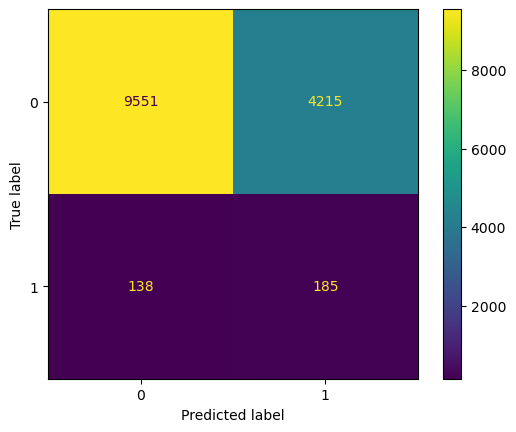

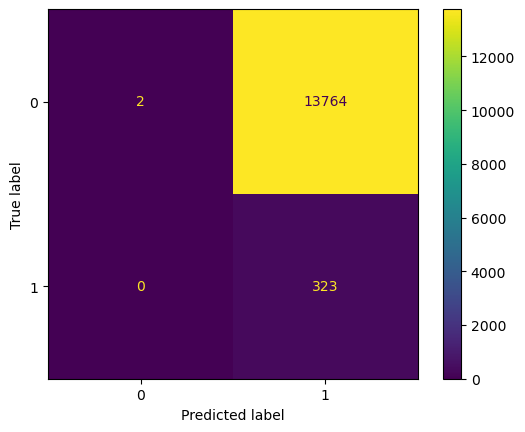

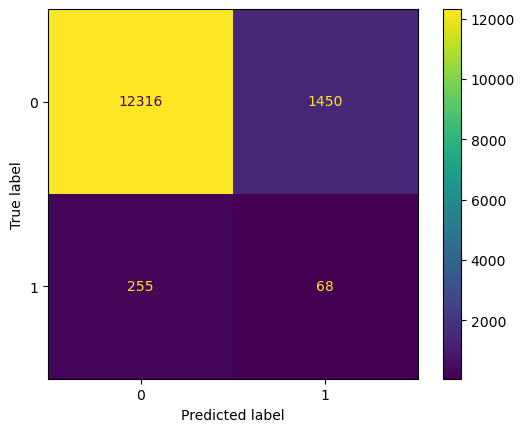

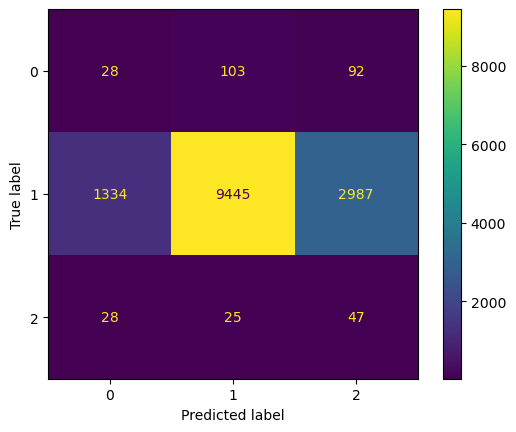

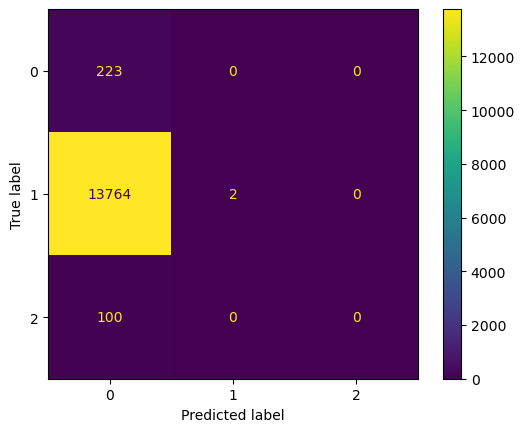

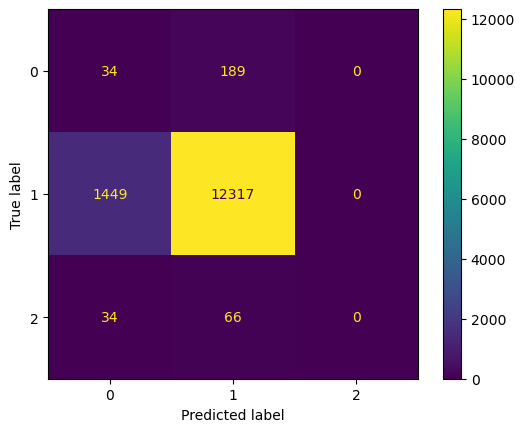

In [34]:
mod1=bnb(); mod2=bnb();mod3=bnb();mod4=bnb();mod5=bnb();mod6=bnb()
m11=myf(mod1)
m12=myf(mod2, altman_train,y_train, altman_test,y_test)
m13=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m14=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m15=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m16=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3)

# KNN

                      0           1  accuracy     macro avg  weighted avg
precision      0.984611    0.044665  0.742636      0.514638      0.963062
recall         0.748293    0.501548  0.742636      0.624920      0.742636
f1-score       0.850338    0.082025  0.742636      0.466182      0.832724
support    13766.000000  323.000000  0.742636  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.984693    0.042392  0.719639      0.513542      0.963090
recall         0.724321    0.520124  0.719639      0.622222      0.719639
f1-score       0.834673    0.078395  0.719639      0.456534      0.817335
support    13766.000000  323.000000  0.719639  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.984378    0.041099  0.713961      0.512739      0.962753
recall         0.718655    0.513932  0.713961      0.616293      0.713961
f1-score       0.830786    0.076112  0

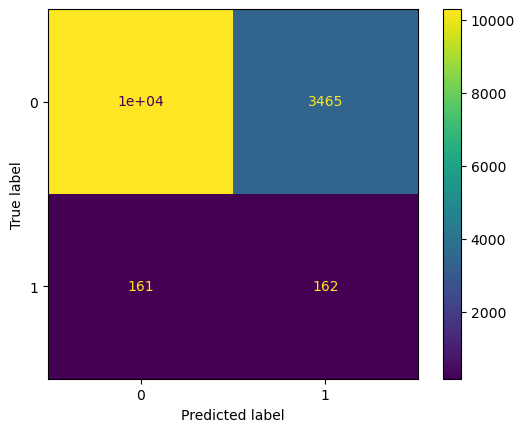

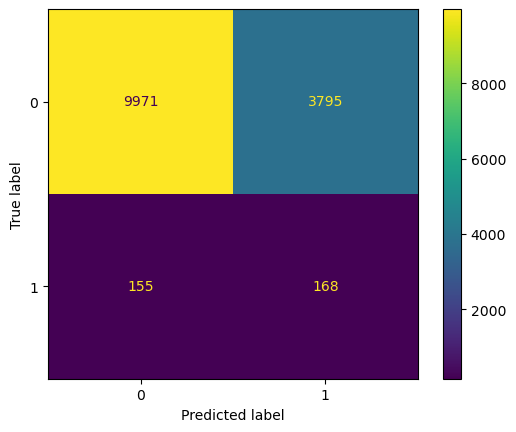

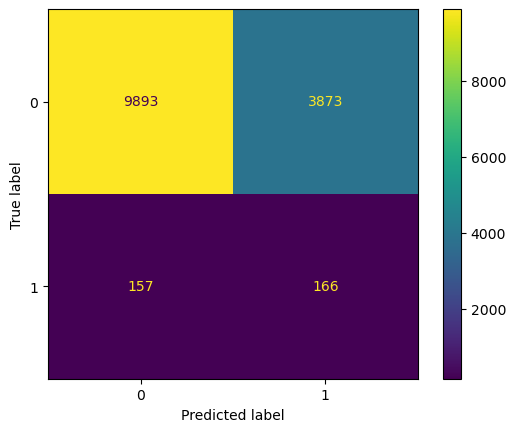

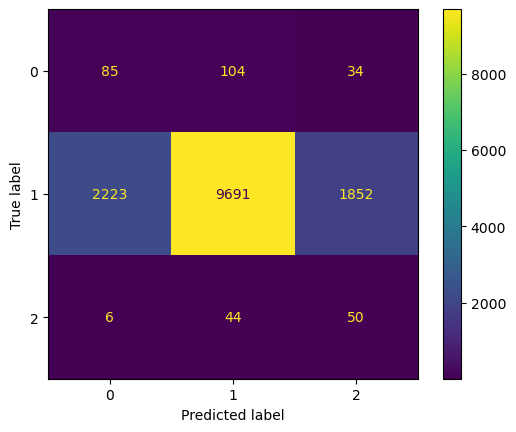

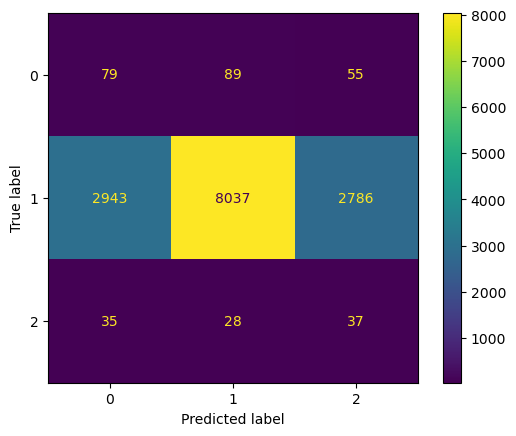

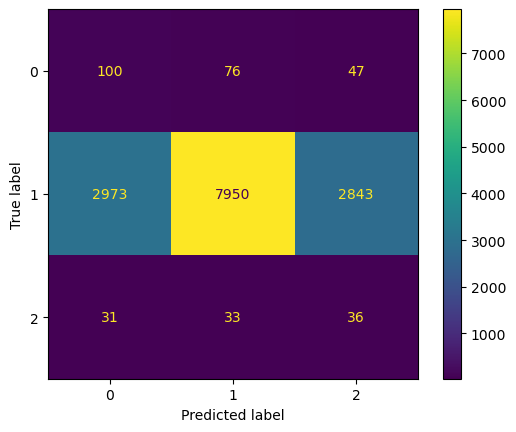

In [35]:
mod1=KNN(leaf_size= 15, n_neighbors=123, weights='distance')
mod2=KNN(leaf_size= 15, n_neighbors=123, weights='distance')
mod3=KNN(leaf_size= 15, n_neighbors=123, weights='distance')
mod4=KNN(leaf_size= 15, n_neighbors=123, weights='distance')
mod5=KNN(leaf_size= 15, n_neighbors=123, weights='distance')
mod6=KNN(leaf_size= 15, n_neighbors=123, weights='distance')

m21=myf(mod1)
m22=myf(mod2, altman_train,y_train, altman_test,y_test)
m23=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m24=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m25=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m26=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3)

# ENET

                      0           1  accuracy     macro avg  weighted avg
precision      0.990093    0.062464  0.760309      0.526279      0.968827
recall         0.762313    0.674923  0.760309      0.718618      0.760309
f1-score       0.861400    0.114346  0.760309      0.487873      0.844273
support    13766.000000  323.000000  0.760309  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.964989    0.022087  0.083256      0.493538      0.943372
recall         0.064071    0.900929  0.083256      0.482500      0.083256
f1-score       0.120163    0.043117  0.083256      0.081640      0.118397
support    13766.000000  323.000000  0.083256  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.986531    0.049526  0.740791      0.518029      0.965049
recall         0.744879    0.566563  0.740791      0.655721      0.740791
f1-score       0.848841    0.091090  0

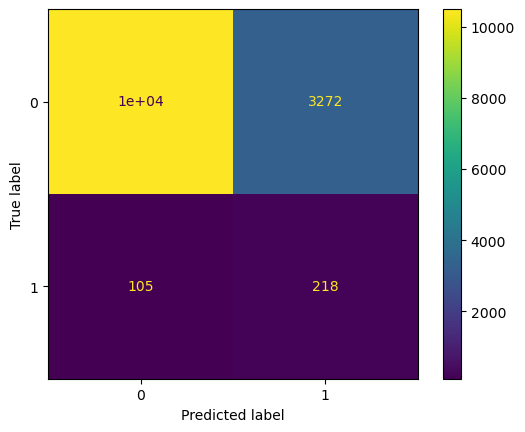

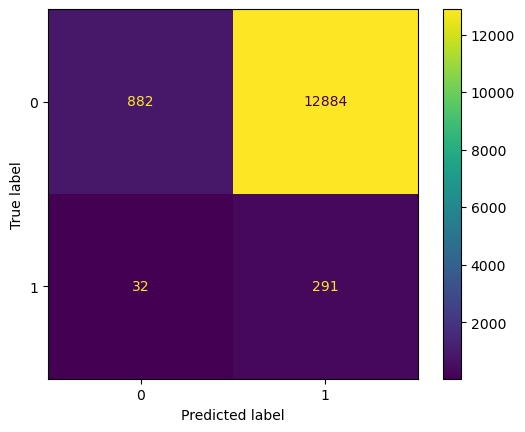

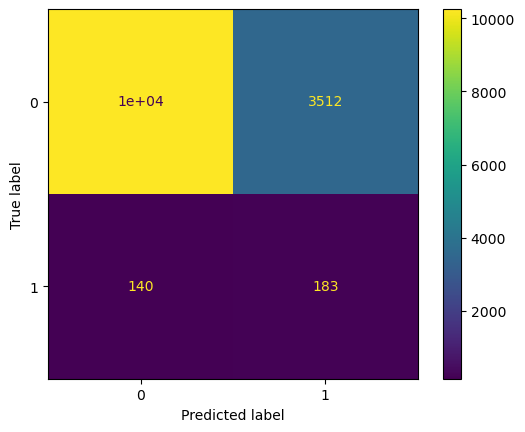

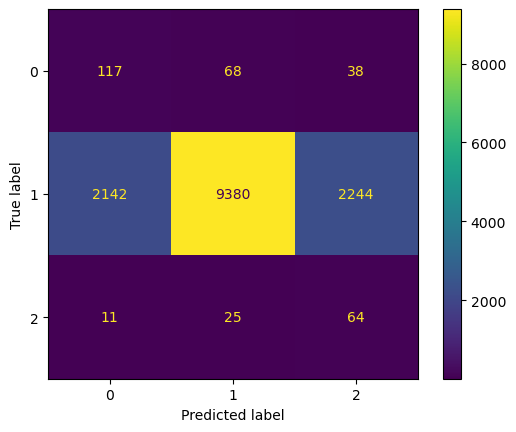

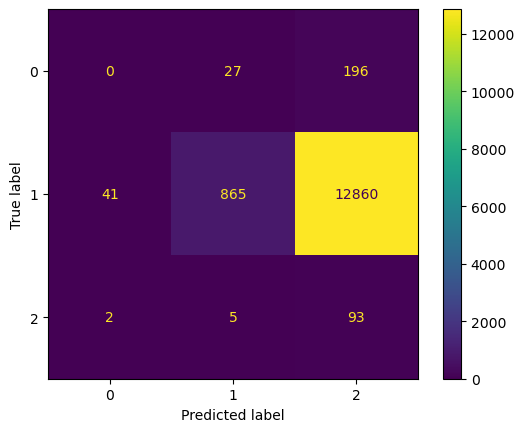

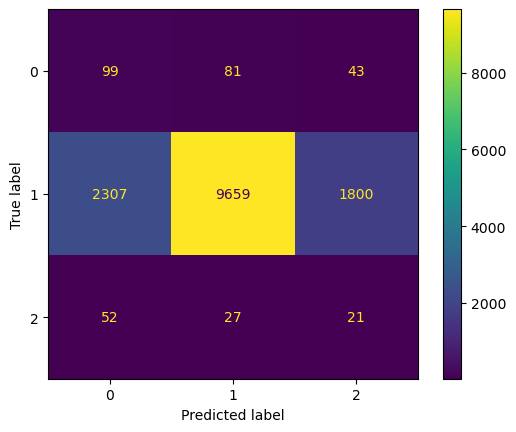

In [36]:
mod1=LR(fit_intercept = True, penalty='elasticnet', solver='saga', l1_ratio=.1,  max_iter=2000)
mod2=LR(fit_intercept = True, penalty='elasticnet', solver='saga', l1_ratio=.1,  max_iter=2000)
mod3=LR(fit_intercept = True, penalty='elasticnet', solver='saga', l1_ratio=.1,  max_iter=2000)
mod4=LR(fit_intercept = True, penalty='elasticnet', solver='saga', l1_ratio=.1,  max_iter=2000)
mod5=LR(fit_intercept = True, penalty='elasticnet', solver='saga', l1_ratio=.1,  max_iter=2000)
mod6=LR(fit_intercept = True, penalty='elasticnet', solver='saga', l1_ratio=.1,  max_iter=2000)
m31=myf(mod1)
m32=myf(mod2, altman_train,y_train, altman_test,y_test)
m33=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m34=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m35=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m36=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3)


# 2-Class Coefficients

In [60]:
pd.set_option('display.max_rows', 200)
tmp1=m31.feature_names_in_
tmp2=(m31.coef_)
df=pd.DataFrame(data=np.transpose(tmp2), index=tmp1, columns=['Coef'])
df['AbsCoef']=abs(df['Coef'])
df.sort_values('AbsCoef', ascending=False)

,Coef,AbsCoef
MedicareDays,-26.909790,26.909790
SelfPayOtherDays,-23.841174,23.841174
LaborCompRatio,16.141119,16.141119
DaysCashOnHand,-10.949267,10.949267
FundBalance,-8.287737,8.287737
DSHPaymentMedicare,6.399149,6.399149
TotalAssets,-4.673414,4.673414
InpatientRevenue,4.605348,4.605348
TotLiabilitiesFundBalance,-4.297971,4.297971
OtherAssets,-4.281092,4.281092


# 3-Class Coefficients

In [62]:
pd.set_option('display.max_rows', 200)
tmp3=m34.feature_names_in_
tmp4=(m34.coef_)
df=pd.DataFrame(data=np.transpose(tmp4), index=tmp1,columns=['Coef1','Coef2','Coef3'])
df['AbsCoef']=abs(df['Coef1'])
df.sort_values('AbsCoef', ascending=False)

,Coef1,Coef2,Coef3,AbsCoef
MedicareDays,-24.482882,23.213203,1.158627,24.482882
DaysCashOnHand,-12.561229,12.889240,-0.216917,12.561229
OhlsonX7,11.640425,-0.378088,-11.151290,11.640425
AdjPxDays,11.624179,-0.493757,-11.019380,11.624179
SelfPayOtherDays,-10.032861,20.003716,-9.859762,10.032861
Overhead,9.766160,-5.133802,-4.521267,9.766160
InpatientRevenue,-9.115263,-3.899535,13.125889,9.115263
OpExpenses,7.716240,4.865992,-12.693325,7.716240
CurLiab,-6.785976,0.694729,5.980170,6.785976
PctPxDiscount,-5.918828,-1.009884,7.039806,5.918828


# RF

                      0           1  accuracy     macro avg  weighted avg
precision      0.977919    0.260000  0.975371      0.618959      0.961460
recall         0.997312    0.040248  0.975371      0.518780      0.975371
f1-score       0.987520    0.069705  0.975371      0.528613      0.966479
support    13766.000000  323.000000  0.975371  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.977916    0.043636  0.941444      0.510776      0.956497
recall         0.961790    0.074303  0.941444      0.518047      0.941444
f1-score       0.969786    0.054983  0.941444      0.512384      0.948813
support    13766.000000  323.000000  0.941444  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.979810    0.033277  0.781958      0.506543      0.958110
recall         0.793186    0.303406  0.781958      0.548296      0.781958
f1-score       0.876676    0.059976  0

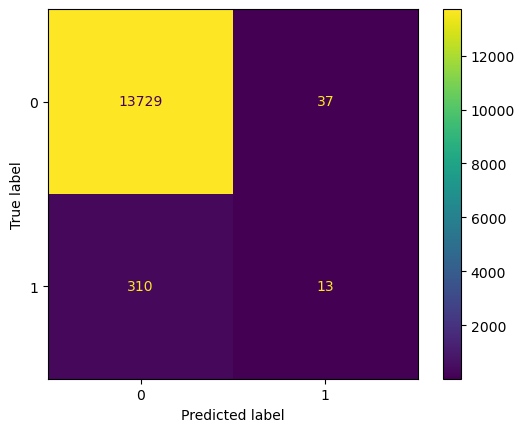

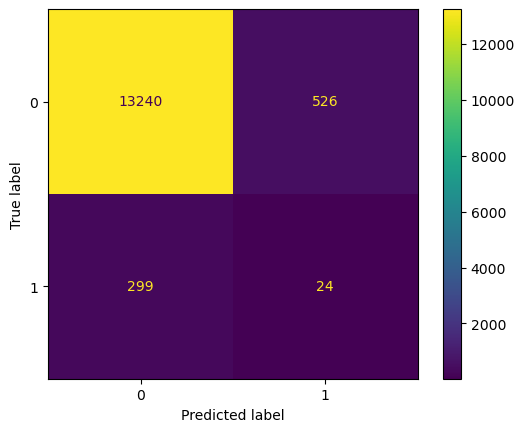

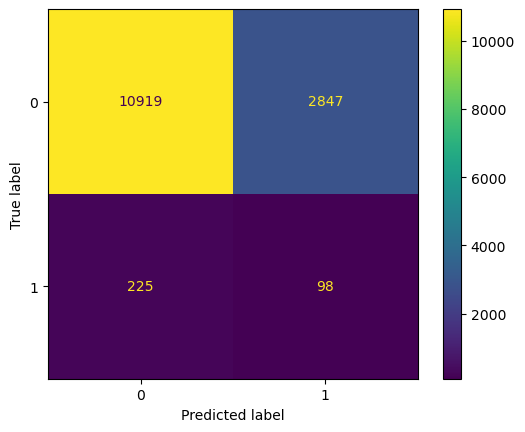

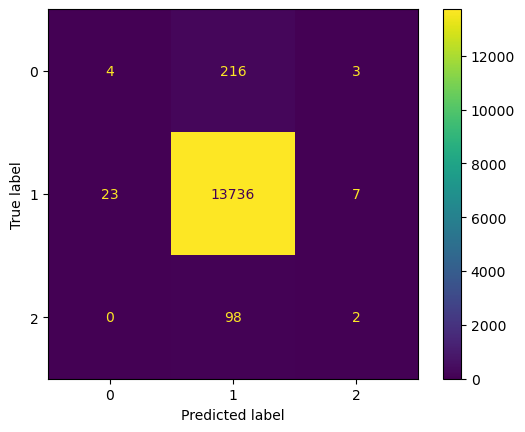

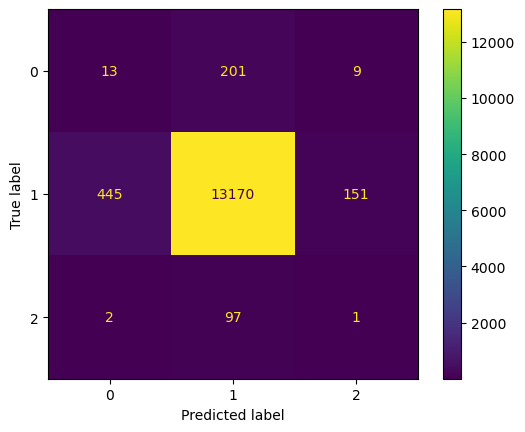

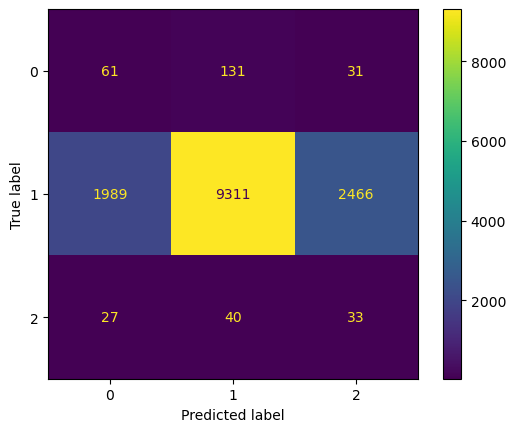

In [63]:
mod1=RFC(n_estimators = 50,max_depth=50,min_samples_split=2, criterion='entropy',bootstrap=True,                   
                            n_jobs = -1, random_state = 1) 
mod2=RFC(n_estimators = 50,max_depth=50,min_samples_split=2, criterion='entropy',bootstrap=True,                   
                            n_jobs = -1, random_state = 1) 
mod3=RFC(n_estimators = 50,max_depth=50,min_samples_split=2, criterion='entropy',bootstrap=True,                   
                            n_jobs = -1, random_state = 1) 
mod4=RFC(n_estimators = 50,max_depth=50,min_samples_split=2, criterion='entropy',bootstrap=True,                   
                            n_jobs = -1, random_state = 1) 
mod5=RFC(n_estimators = 50,max_depth=50,min_samples_split=2, criterion='entropy',bootstrap=True,                   
                            n_jobs = -1, random_state = 1) 
mod6=RFC(n_estimators = 50,max_depth=50,min_samples_split=2, criterion='entropy',bootstrap=True,                   
                            n_jobs = -1, random_state = 1) 

m41=myf(mod1)
m42=myf(mod2, altman_train,y_train, altman_test,y_test)
m43=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m44=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m45=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m46=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3)

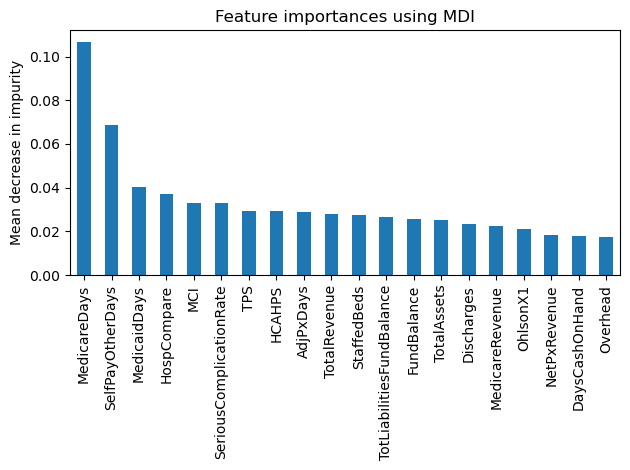

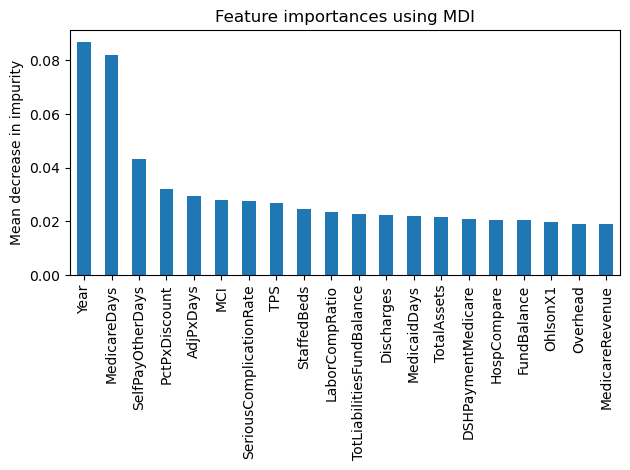

In [67]:
p1=mytree(m41)
p2=mytree(m44)

In [70]:
p1

MedicareDays                 0.106674
SelfPayOtherDays             0.068529
MedicaidDays                 0.040214
HospCompare                  0.036935
MCI                          0.033160
SeriousComplicationRate      0.032808
TPS                          0.029535
HCAHPS                       0.029360
AdjPxDays                    0.028753
TotalRevenue                 0.027717
StaffedBeds                  0.027503
TotLiabilitiesFundBalance    0.026673
FundBalance                  0.025494
TotalAssets                  0.025152
Discharges                   0.023176
MedicareRevenue              0.022520
OhlsonX1                     0.020954
NetPxRevenue                 0.018536
DaysCashOnHand               0.017739
Overhead                     0.017630
dtype: float64

In [71]:
p2

Year                         0.086858
MedicareDays                 0.081976
SelfPayOtherDays             0.043369
PctPxDiscount                0.032081
AdjPxDays                    0.029577
MCI                          0.028114
SeriousComplicationRate      0.027514
TPS                          0.026674
StaffedBeds                  0.024777
LaborCompRatio               0.023557
TotLiabilitiesFundBalance    0.022796
Discharges                   0.022555
MedicaidDays                 0.022060
TotalAssets                  0.021813
DSHPaymentMedicare           0.020952
HospCompare                  0.020642
FundBalance                  0.020516
OhlsonX1                     0.019694
Overhead                     0.019079
MedicareRevenue              0.019041
dtype: float64

# Extra Trees

                      0           1  accuracy     macro avg  weighted avg
precision      0.986663    0.077916  0.851728      0.532290      0.965830
recall         0.859872    0.504644  0.851728      0.682258      0.851728
f1-score       0.918915    0.134990  0.851728      0.526952      0.900943
support    13766.000000  323.000000  0.851728  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.982103    0.023090  0.053517      0.502597      0.960117
recall         0.031890    0.975232  0.053517      0.503561      0.053517
f1-score       0.061774    0.045113  0.053517      0.053444      0.061392
support    13766.000000  323.000000  0.053517  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.982162    0.055094  0.855561      0.518628      0.960908
recall         0.867935    0.328173  0.855561      0.598054      0.855561
f1-score       0.921523    0.094348  0

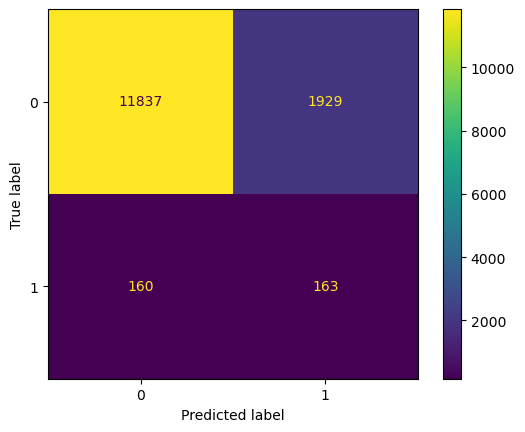

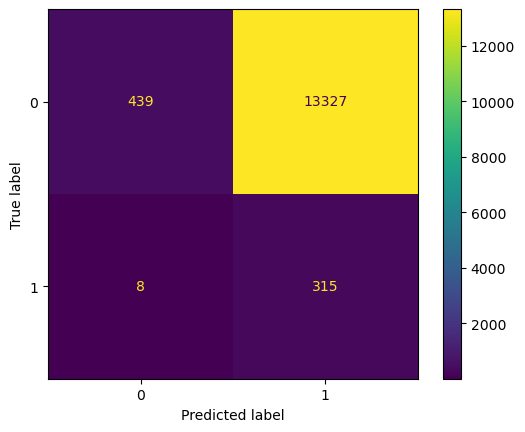

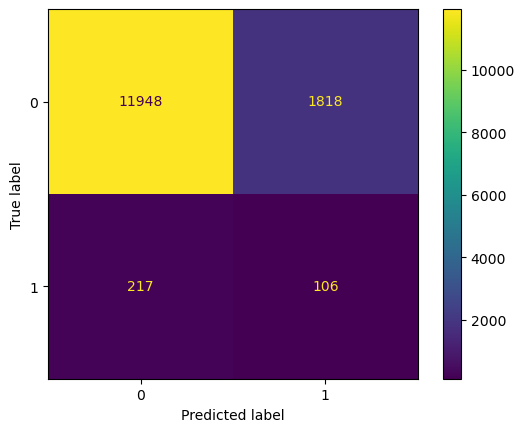

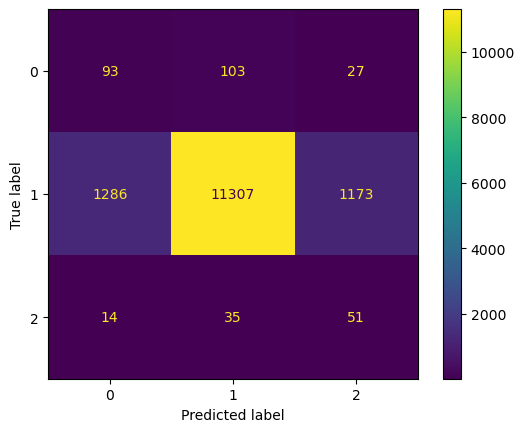

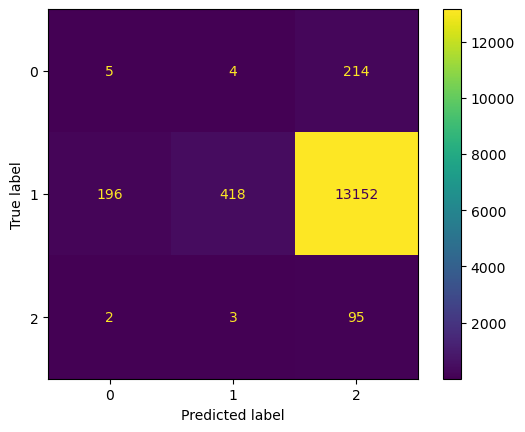

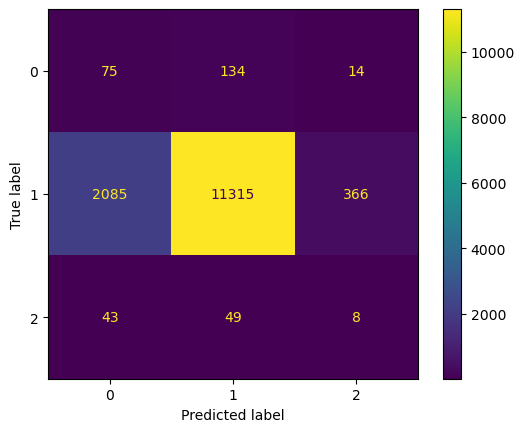

In [74]:
mod1=ETC(n_estimators = 50, max_depth=10, min_samples_split=2,criterion='entropy',
                           bootstrap=True, n_jobs = -1, random_state = 1) #previously tuned
mod2=ETC(n_estimators = 50, max_depth=10, min_samples_split=2,criterion='entropy',
                           bootstrap=True, n_jobs = -1, random_state = 1) #previously tuned
mod3=ETC(n_estimators = 50, max_depth=10, min_samples_split=2,criterion='entropy',
                           bootstrap=True, n_jobs = -1, random_state = 1) #previously tuned
mod4=ETC(n_estimators = 50, max_depth=10, min_samples_split=2,criterion='entropy',
                       bootstrap=True, n_jobs = -1, random_state = 1) #previously tuned
mod5=ETC(n_estimators = 50, max_depth=10, min_samples_split=2,criterion='entropy',
                           bootstrap=True, n_jobs = -1, random_state = 1) #previously tuned
mod6=ETC(n_estimators = 50, max_depth=10, min_samples_split=2,criterion='entropy',
                           bootstrap=True, n_jobs = -1, random_state = 1) #previously tuned

m51=myf(mod1)
m52=myf(mod2, altman_train,y_train, altman_test,y_test)
m53=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m54=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m55=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m56=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3) 

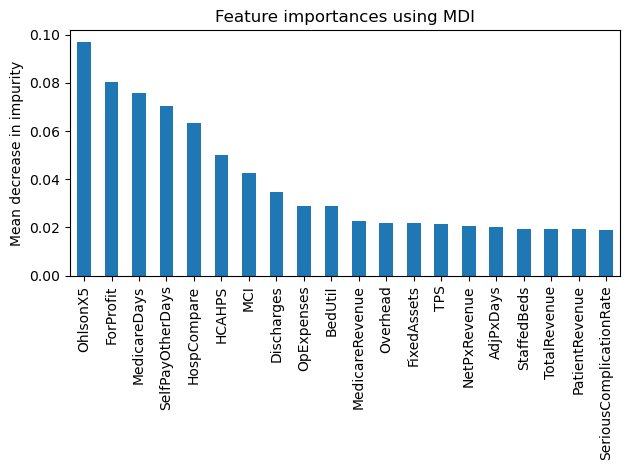

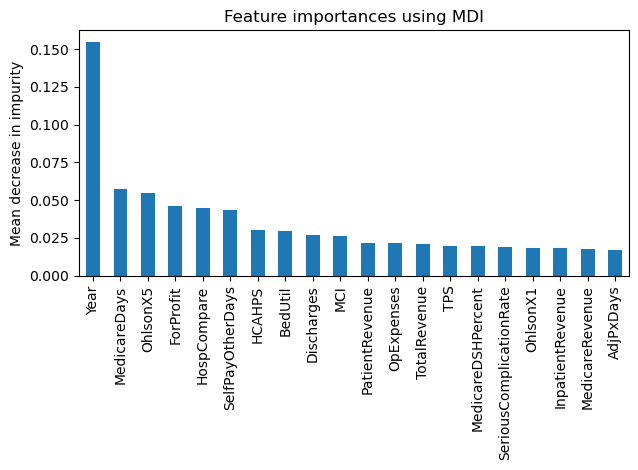

In [75]:
p3=mytree(m51)
p4=mytree(m54)

In [76]:
p3

OhlsonX5                   0.096915
ForProfit                  0.080424
MedicareDays               0.075760
SelfPayOtherDays           0.070564
HospCompare                0.063458
HCAHPS                     0.050161
MCI                        0.042474
Discharges                 0.034686
OpExpenses                 0.028908
BedUtil                    0.028897
MedicareRevenue            0.022602
Overhead                   0.021946
FixedAssets                0.021846
TPS                        0.021606
NetPxRevenue               0.020717
AdjPxDays                  0.019984
StaffedBeds                0.019488
TotalRevenue               0.019242
PatientRevenue             0.019195
SeriousComplicationRate    0.018879
dtype: float64

In [77]:
p4

Year                       0.154712
MedicareDays               0.057122
OhlsonX5                   0.054441
ForProfit                  0.045956
HospCompare                0.044930
SelfPayOtherDays           0.043639
HCAHPS                     0.030477
BedUtil                    0.029599
Discharges                 0.027010
MCI                        0.026270
PatientRevenue             0.021939
OpExpenses                 0.021642
TotalRevenue               0.020873
TPS                        0.019777
MedicareDSHPercent         0.019772
SeriousComplicationRate    0.019117
OhlsonX1                   0.018539
InpatientRevenue           0.018063
MedicareRevenue            0.017649
AdjPxDays                  0.016986
dtype: float64

# GBC 

                      0           1  accuracy     macro avg  weighted avg
precision      0.989834    0.049703  0.686422      0.519769      0.968281
recall         0.686111    0.699690  0.686422      0.692901      0.686422
f1-score       0.810451    0.092813  0.686422      0.451632      0.793999
support    13766.000000  323.000000  0.686422  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.978437    0.047749  0.930016      0.513093      0.957100
recall         0.949295    0.108359  0.930016      0.528827      0.930016
f1-score       0.963646    0.066288  0.930016      0.514967      0.943073
support    13766.000000  323.000000  0.930016  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.991058    0.044907  0.623181      0.517982      0.969367
recall         0.619933    0.761610  0.623181      0.690772      0.623181
f1-score       0.762747    0.084813  0

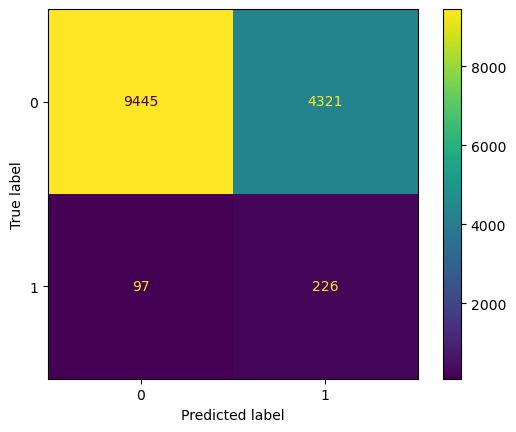

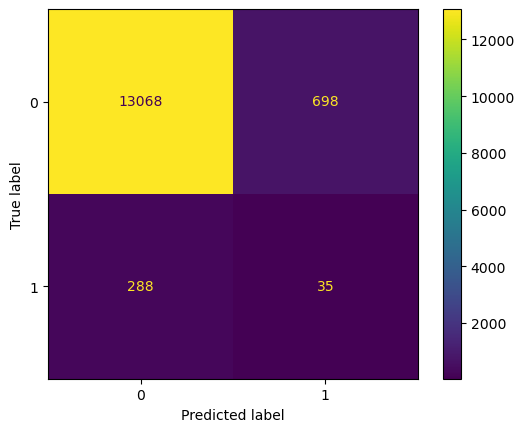

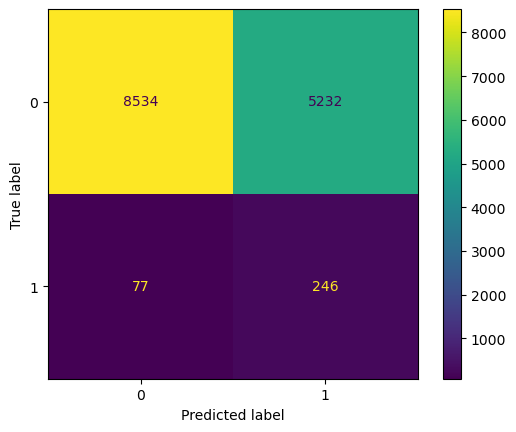

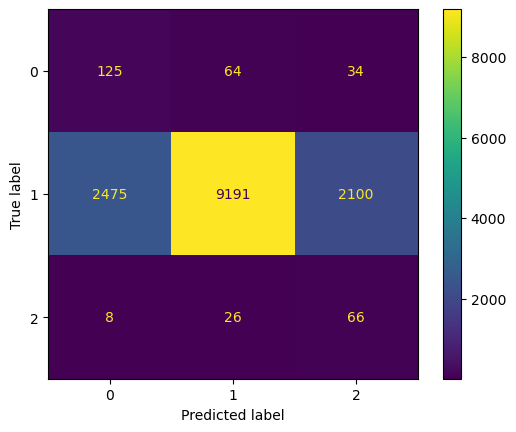

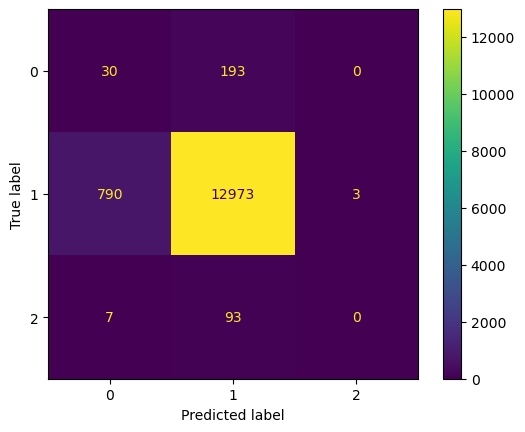

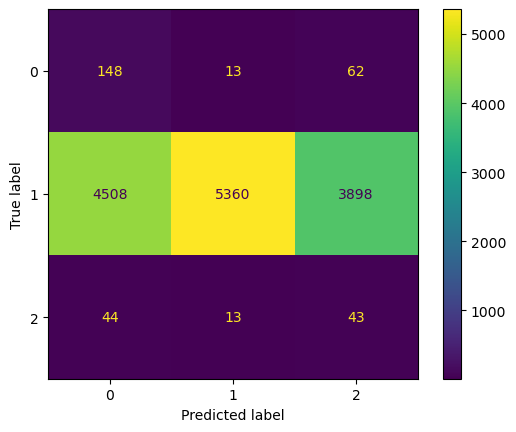

In [79]:
mod1=GBC(n_estimators = 10, random_state = 1)
mod2=GBC(n_estimators = 10, random_state = 1)
mod3=GBC(n_estimators = 10, random_state = 1)
mod4=GBC(n_estimators = 10, random_state = 1)
mod5=GBC(n_estimators = 10, random_state = 1)
mod6=GBC(n_estimators = 10, random_state = 1)

m61=myf(mod1)
m62=myf(mod2, altman_train,y_train, altman_test,y_test)
m63=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m64=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m65=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m66=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3) 

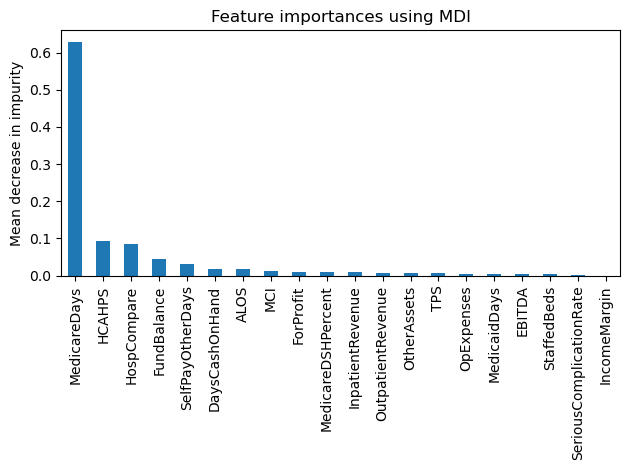

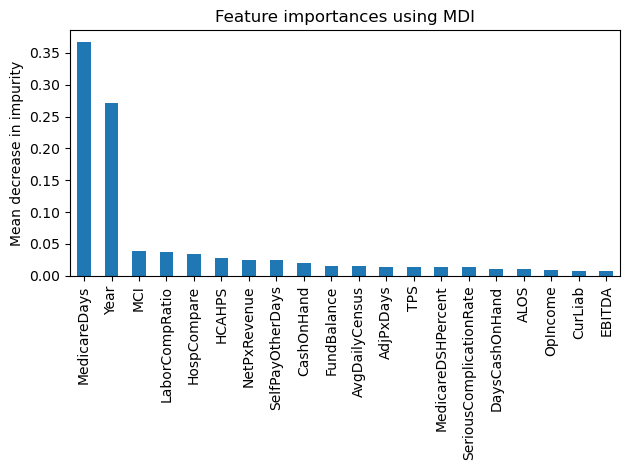

In [81]:
p5=mytree(m61)
p6=mytree(m64)

In [82]:
p5

MedicareDays               0.628404
HCAHPS                     0.092067
HospCompare                0.083847
FundBalance                0.044329
SelfPayOtherDays           0.030005
DaysCashOnHand             0.017979
ALOS                       0.016727
MCI                        0.012744
ForProfit                  0.010497
MedicareDSHPercent         0.010394
InpatientRevenue           0.010087
OutpatientRevenue          0.008155
OtherAssets                0.007226
TPS                        0.007081
OpExpenses                 0.005410
MedicaidDays               0.005315
EBITDA                     0.004127
StaffedBeds                0.003901
SeriousComplicationRate    0.001581
IncomeMargin               0.000052
dtype: float64

In [83]:
p6

MedicareDays               0.367112
Year                       0.270789
MCI                        0.038954
LaborCompRatio             0.036430
HospCompare                0.033399
HCAHPS                     0.027328
NetPxRevenue               0.024921
SelfPayOtherDays           0.024346
CashOnHand                 0.020193
FundBalance                0.015476
AvgDailyCensus             0.015395
AdjPxDays                  0.014257
TPS                        0.013987
MedicareDSHPercent         0.013348
SeriousComplicationRate    0.013043
DaysCashOnHand             0.011002
ALOS                       0.009776
OpIncome                   0.008212
CurLiab                    0.008058
EBITDA                     0.006853
dtype: float64

# ADA

                      0           1  accuracy     macro avg  weighted avg
precision      0.988235    0.060767  0.776989      0.524501      0.966972
recall         0.781055    0.603715  0.776989      0.692385      0.776989
f1-score       0.872515    0.110419  0.776989      0.491467      0.855043
support    13766.000000  323.000000  0.776989  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.978317    0.049839  0.937327      0.514078      0.957031
recall         0.957068    0.095975  0.937327      0.526522      0.937327
f1-score       0.967576    0.065608  0.937327      0.516592      0.946898
support    13766.000000  323.000000  0.937327  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.990003    0.048057  0.670026      0.519030      0.968408
recall         0.669040    0.712074  0.670026      0.690557      0.670026
f1-score       0.798474    0.090037  0

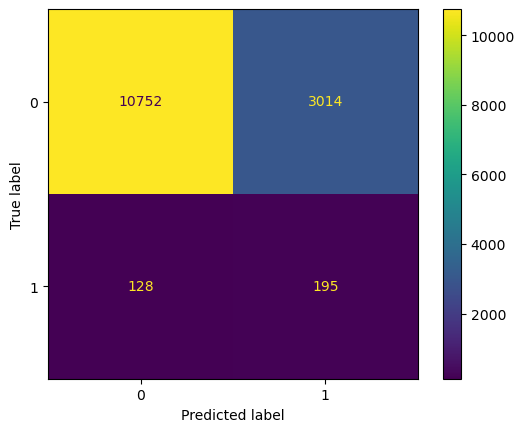

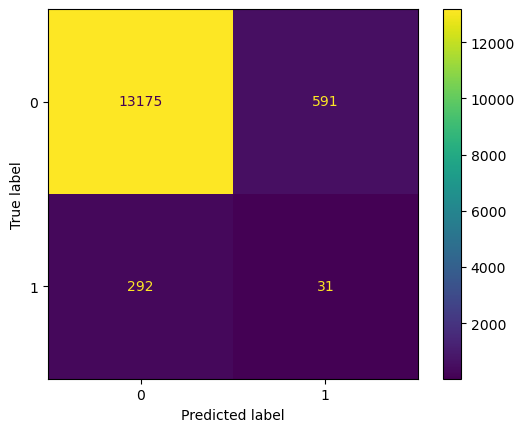

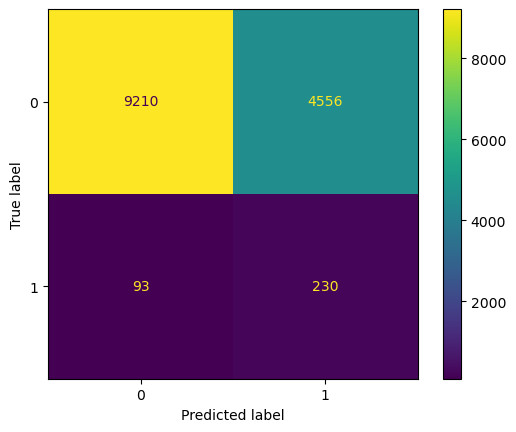

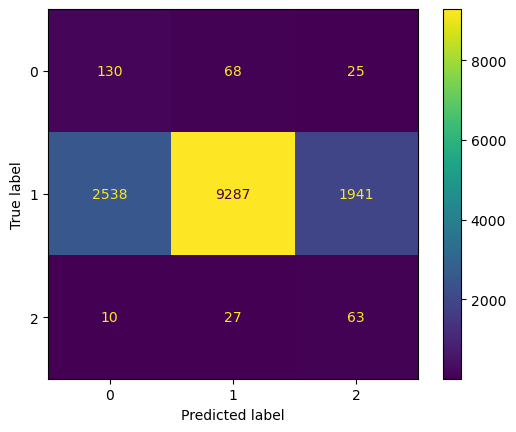

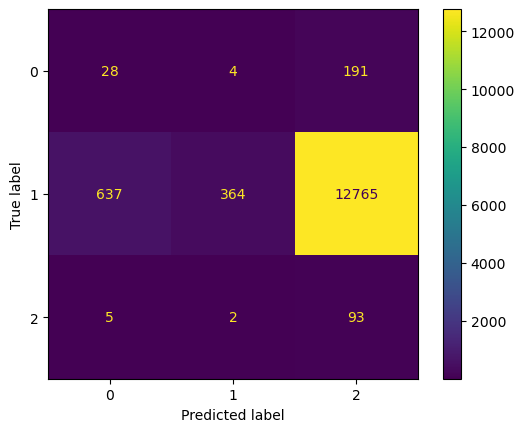

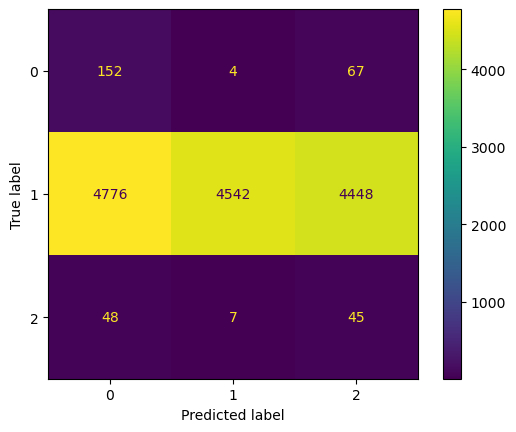

In [84]:
mod1=ABC(n_estimators=10, random_state=1)
mod2=ABC(n_estimators=10, random_state=1)
mod3=ABC(n_estimators=10, random_state=1)
mod4=ABC(n_estimators=10, random_state=1)
mod5=ABC(n_estimators=10, random_state=1)
mod6=ABC(n_estimators=10, random_state=1)

m71=myf(mod1)
m72=myf(mod2, altman_train,y_train, altman_test,y_test)
m73=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m74=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m75=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m76=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3) 

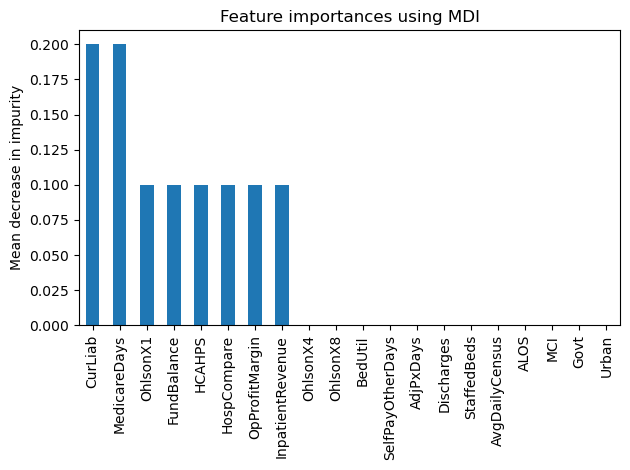

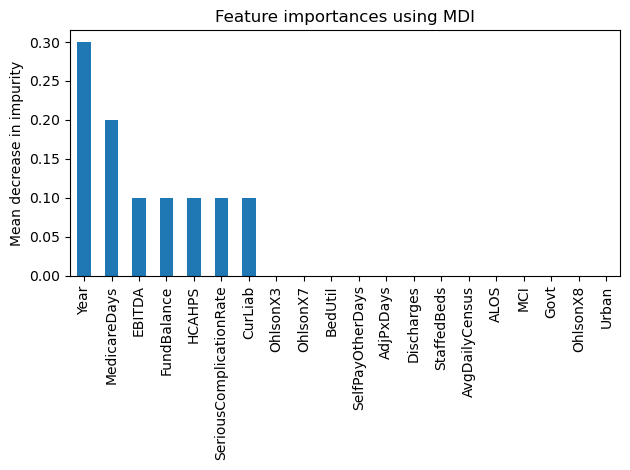

In [85]:
p7=mytree(m71)
p8=mytree(m74)

In [87]:
p7

CurLiab             0.2
MedicareDays        0.2
OhlsonX1            0.1
FundBalance         0.1
HCAHPS              0.1
HospCompare         0.1
OpProfitMargin      0.1
InpatientRevenue    0.1
OhlsonX4            0.0
OhlsonX8            0.0
BedUtil             0.0
SelfPayOtherDays    0.0
AdjPxDays           0.0
Discharges          0.0
StaffedBeds         0.0
AvgDailyCensus      0.0
ALOS                0.0
MCI                 0.0
Govt                0.0
Urban               0.0
dtype: float64

In [88]:
p8

Year                       0.3
MedicareDays               0.2
EBITDA                     0.1
FundBalance                0.1
HCAHPS                     0.1
SeriousComplicationRate    0.1
CurLiab                    0.1
OhlsonX3                   0.0
OhlsonX7                   0.0
BedUtil                    0.0
SelfPayOtherDays           0.0
AdjPxDays                  0.0
Discharges                 0.0
StaffedBeds                0.0
AvgDailyCensus             0.0
ALOS                       0.0
MCI                        0.0
Govt                       0.0
OhlsonX8                   0.0
Urban                      0.0
dtype: float64

# LDA 

                      0           1  accuracy     macro avg  weighted avg
precision      0.990500    0.056978  0.726524      0.523739      0.969098
recall         0.727081    0.702786  0.726524      0.714934      0.726524
f1-score       0.838591    0.105410  0.726524      0.472000      0.821782
support    13766.000000  323.000000  0.726524  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.964874    0.022082  0.083044      0.493478      0.943260
recall         0.063853    0.900929  0.083044      0.482391      0.083044
f1-score       0.119779    0.043108  0.083044      0.081444      0.118022
support    13766.000000  323.000000  0.083044  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.984933    0.054526  0.799631      0.519730      0.963603
recall         0.807279    0.473684  0.799631      0.640482      0.799631
f1-score       0.887301    0.097795  0

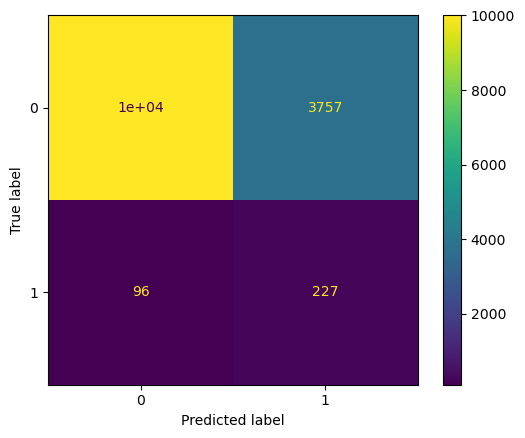

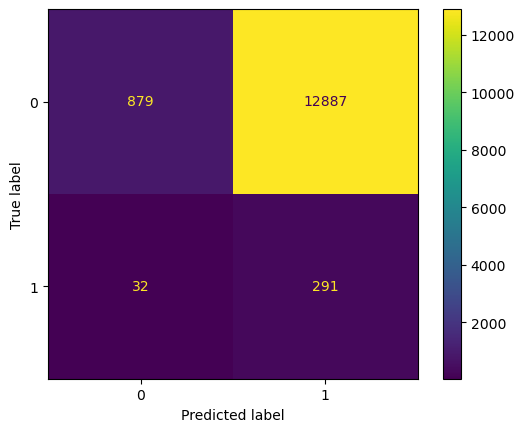

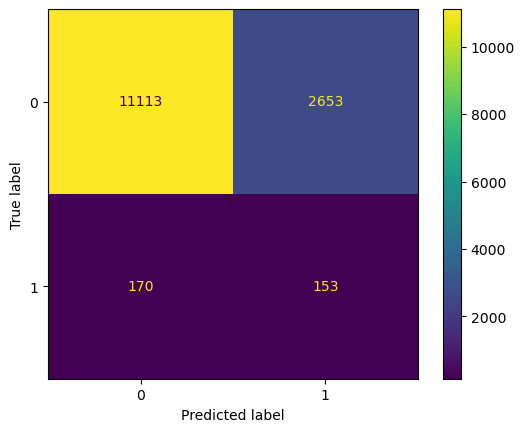

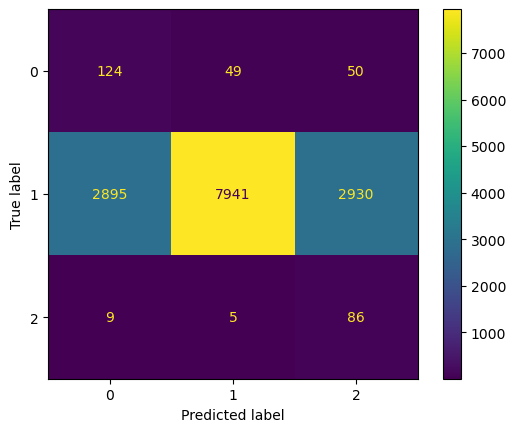

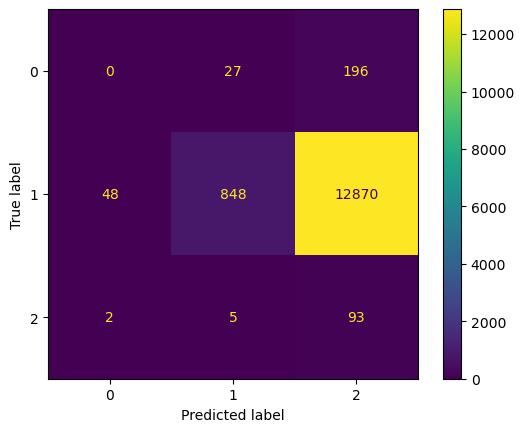

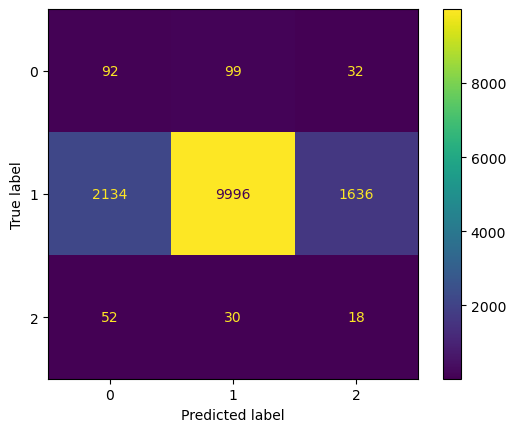

In [89]:
mod1=LDA()
mod2=LDA()
mod3=LDA()
mod4=LDA()
mod5=LDA()
mod6=LDA()

m81=myf(mod1)
m82=myf(mod2, altman_train,y_train, altman_test,y_test)
m83=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m84=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m85=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m86=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3) 

# SVM

                      0           1  accuracy     macro avg  weighted avg
precision      0.988787    0.058688  0.759316      0.523738      0.967464
recall         0.762313    0.631579  0.759316      0.696946      0.759316
f1-score       0.860905    0.107397  0.759316      0.484151      0.843630
support    13766.000000  323.000000  0.759316  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.965066    0.022091  0.083398      0.493578      0.943447
recall         0.064216    0.900929  0.083398      0.482572      0.083398
f1-score       0.120420    0.043124  0.083398      0.081772      0.118648
support    13766.000000  323.000000  0.083398  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.985243    0.053427  0.788416      0.519335      0.963880
recall         0.795365    0.492260  0.788416      0.643813      0.788416
f1-score       0.880180    0.096393  0

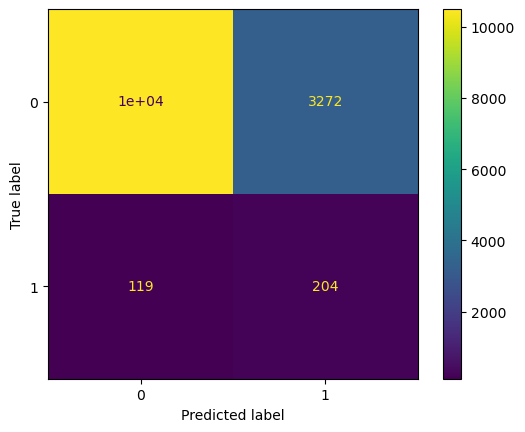

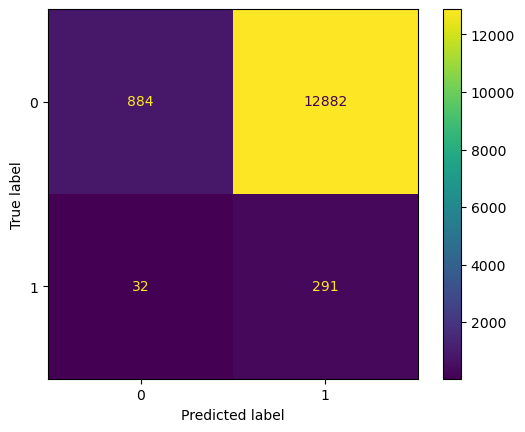

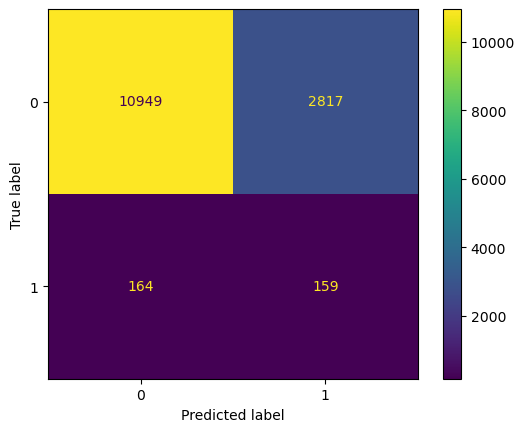

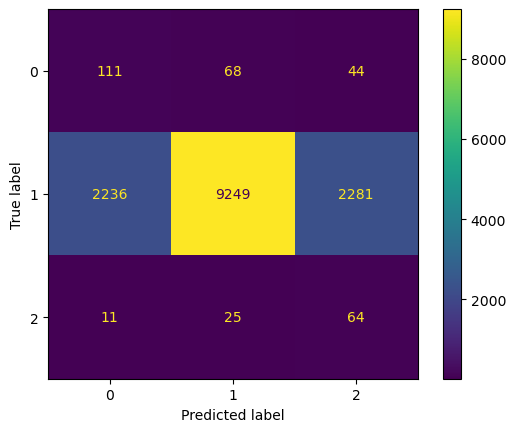

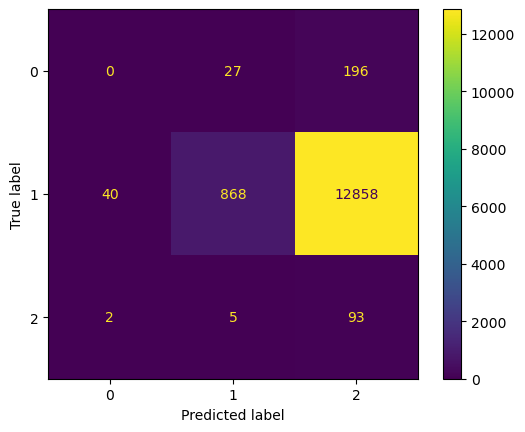

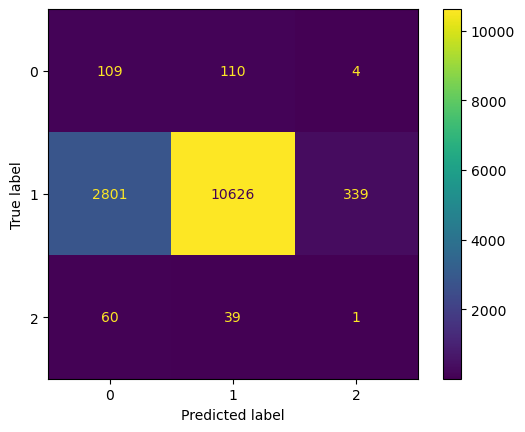

In [90]:
mod1=LinearSVC(random_state=1, tol=1e-5)
mod2=LinearSVC(random_state=1, tol=1e-5)
mod3=LinearSVC(random_state=1, tol=1e-5)
mod4=LinearSVC(random_state=1, tol=1e-5)
mod5=LinearSVC(random_state=1, tol=1e-5)
mod6=LinearSVC(random_state=1, tol=1e-5)



m91=myf(mod1)
m92=myf(mod2, altman_train,y_train, altman_test,y_test)
m93=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m94=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m95=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m96=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3) 

In [93]:
pd.set_option('display.max_rows', 200)
tmp5=m91.feature_names_in_
tmp6=(m91.coef_)
df=pd.DataFrame(data=np.transpose(tmp6), index=tmp1, columns=['Coef'])
df['AbsCoef']=abs(df['Coef'])
df.sort_values('AbsCoef', ascending=False)

,Coef,AbsCoef
SelfPayOtherDays,-15.578335,15.578335
FundBalance,-11.830308,11.830308
MedicareDays,-11.380572,11.380572
LaborCompRatio,10.963362,10.963362
Overhead,10.341238,10.341238
OtherAssets,-9.209104,9.209104
DaysCashOnHand,-8.620249,8.620249
OpExpenses,-7.664378,7.664378
OhlsonX7,6.855890,6.855890
TotalAssets,-6.582877,6.582877


In [94]:
pd.set_option('display.max_rows', 200)
tmp7=m94.feature_names_in_
tmp8=(m94.coef_)
df=pd.DataFrame(data=np.transpose(tmp4), index=tmp1,columns=['Coef1','Coef2','Coef3'])
df['AbsCoef']=abs(df['Coef1'])
df.sort_values('AbsCoef', ascending=False)

,Coef1,Coef2,Coef3,AbsCoef
MedicareDays,-24.482882,23.213203,1.158627,24.482882
DaysCashOnHand,-12.561229,12.889240,-0.216917,12.561229
OhlsonX7,11.640425,-0.378088,-11.151290,11.640425
AdjPxDays,11.624179,-0.493757,-11.019380,11.624179
SelfPayOtherDays,-10.032861,20.003716,-9.859762,10.032861
Overhead,9.766160,-5.133802,-4.521267,9.766160
InpatientRevenue,-9.115263,-3.899535,13.125889,9.115263
OpExpenses,7.716240,4.865992,-12.693325,7.716240
CurLiab,-6.785976,0.694729,5.980170,6.785976
PctPxDiscount,-5.918828,-1.009884,7.039806,5.918828


# MLP

C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


                      0           1  accuracy     macro avg  weighted avg
precision      0.978795    0.073913  0.949251      0.526354      0.958050
recall         0.969054    0.105263  0.949251      0.537159      0.949251
f1-score       0.973900    0.086845  0.949251      0.530373      0.953564
support    13766.000000  323.000000  0.949251  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.977139    0.250000  0.976932      0.613569      0.960469
recall         0.999782    0.003096  0.976932      0.501439      0.976932
f1-score       0.988331    0.006116  0.976932      0.497223      0.965813
support    13766.000000  323.000000  0.976932  14089.000000  14089.000000
                      0           1  accuracy     macro avg  weighted avg
precision      0.991381    0.041756  0.581376      0.516569      0.969611
recall         0.576565    0.786378  0.581376      0.681472      0.581376
f1-score       0.729102    0.079301  0

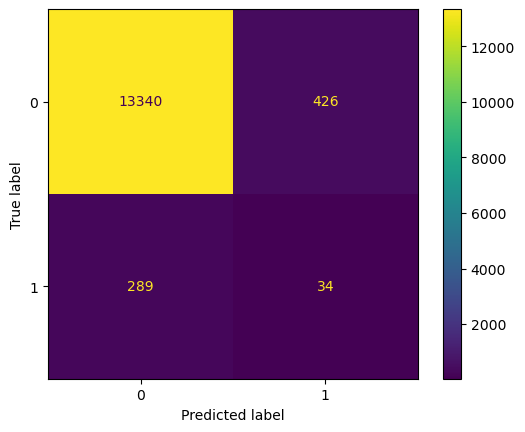

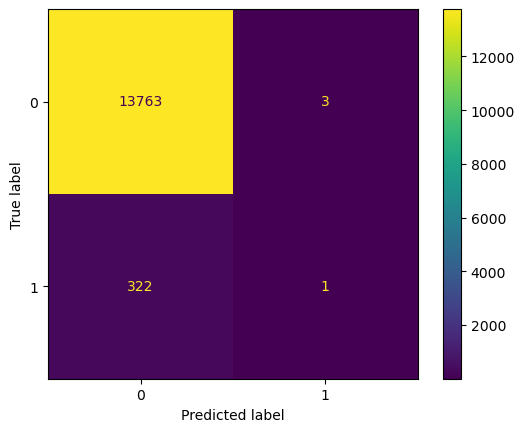

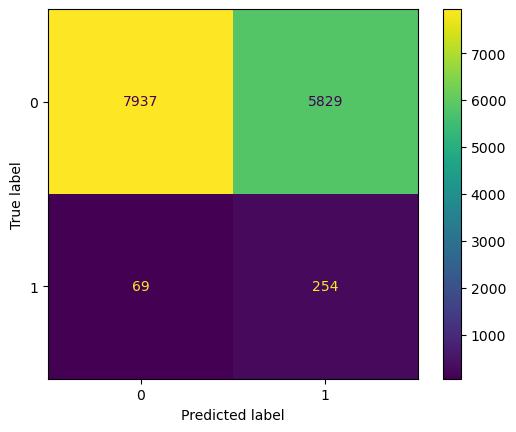

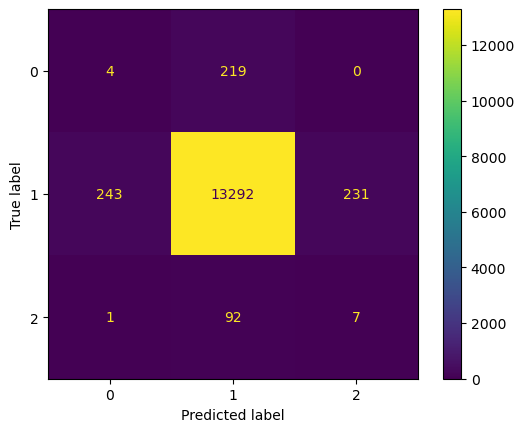

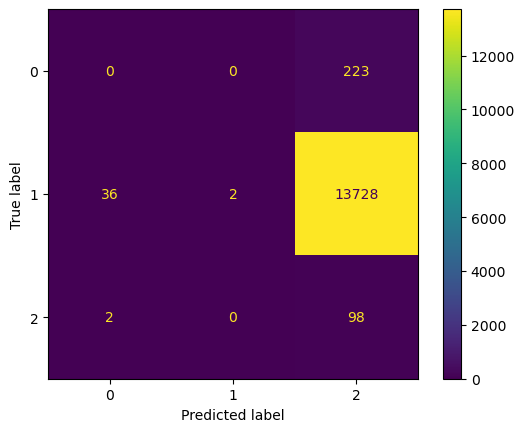

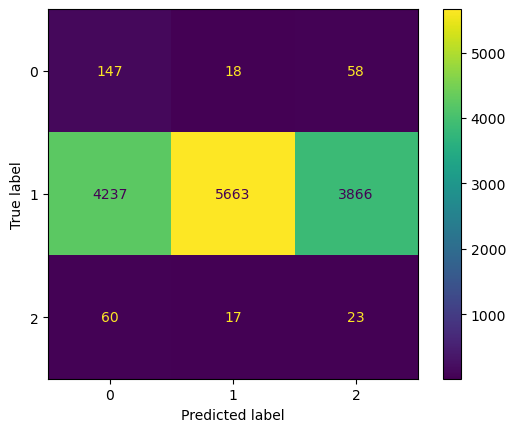

In [95]:
mod1=MLP(random_state=1, max_iter=300)
mod2=MLP(random_state=1, max_iter=300)
mod3=MLP(random_state=1, max_iter=300)
mod4=MLP(random_state=1, max_iter=300)
mod5=MLP(random_state=1, max_iter=300)
mod6=MLP(random_state=1, max_iter=300)

m101=myf(mod1)
m102=myf(mod2, altman_train,y_train, altman_test,y_test)
m103=myf(mod3, ohlson_train,y_train, ohlson_test,y_test)
m104=myf(mod4, X_train3, y_train3, X_test3,y_test3)
m105=myf(mod5, altman_train3,y_train3, altman_test3,y_test3)
m106=myf(mod6, ohlson_train3,y_train3, ohlson_test3,y_test3) 